In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./pulsar_stars.csv')

train_df = df.sample(frac=0.7,random_state=25)
test_df = df.drop(train_df.index)

In [3]:
len(train_df)

12529

In [8]:
train_df['target_class'].value_counts()

0    11400
1     1129
Name: target_class, dtype: int64

In [4]:
len(test_df)

5369

In [9]:
test_df['target_class'].value_counts()

0    4859
1     510
Name: target_class, dtype: int64

In [3]:
X_train = train_df.drop('target_class', axis=1)
y_train = train_df['target_class']
X_test = test_df.drop('target_class', axis=1)
y_test = test_df['target_class']

In [4]:
X_train = train_df.drop('target_class', axis=1)
y_train = train_df['target_class']
X_test = test_df.drop('target_class', axis=1)
y_test = test_df['target_class']

print('Starting RandomUnderSampler at', datetime.now().strftime("%H:%M:%S"))
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=25)
X_train_rus, y_train_rus = undersampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting NearMiss-3 at', datetime.now().strftime("%H:%M:%S"))
undersampler = NearMiss(sampling_strategy='majority', version=3, n_jobs=-1)
X_train_nm3, y_train_nm3 = undersampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting CondensedNearestNeighbour at', datetime.now().strftime("%H:%M:%S"))
undersampler = CondensedNearestNeighbour(sampling_strategy='majority', n_jobs=-1)
X_train_cnn, y_train_cnn = undersampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting RandomOverSampler at', datetime.now().strftime("%H:%M:%S"))
oversampler = RandomOverSampler(sampling_strategy=.2, random_state=25)
X_train_ros, y_train_ros = oversampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting SMOTE at', datetime.now().strftime("%H:%M:%S"))
oversampler = SMOTE(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting ADASYN at', datetime.now().strftime("%H:%M:%S"))
oversampler = ADASYN(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_adasyn, y_train_adasyn = oversampler.fit_resample(X_train, y_train)
print('Done at', datetime.now().strftime("%H:%M:%S"))

Starting RandomUnderSampler at 13:18:45
Done at 13:18:45
Starting NearMiss-3 at 13:18:45
Done at 13:18:45
Starting CondensedNearestNeighbour at 13:18:45
Done at 13:26:21
Starting RandomOverSampler at 13:26:21
Done at 13:26:21
Starting SMOTE at 13:26:21
Done at 13:26:21
Starting ADASYN at 13:26:21
Done at 13:26:22


In [5]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

print('Starting RandomUnderSampler at', datetime.now().strftime("%H:%M:%S"))
undersampler = RandomUnderSampler(random_state=25)
X_train_scaled_rus, y_train_scaled_rus = undersampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_rus, y_train_scaled_rus = pd.DataFrame(X_train_scaled_rus), pd.Series(y_train_scaled_rus)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting NearMiss-3 at', datetime.now().strftime("%H:%M:%S"))
undersampler = NearMiss(version=3, n_jobs=-1)
X_train_scaled_nm3, y_train_scaled_nm3 = undersampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_nm3, y_train_scaled_nm3 = pd.DataFrame(X_train_scaled_nm3), pd.Series(y_train_scaled_nm3)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting CondensedNearestNeighbour at', datetime.now().strftime("%H:%M:%S"))
undersampler = CondensedNearestNeighbour(n_jobs=-1)
X_train_scaled_cnn, y_train_scaled_cnn = undersampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_cnn, y_train_scaled_cnn = pd.DataFrame(X_train_scaled_cnn), pd.Series(y_train_scaled_cnn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting RandomOverSampler at', datetime.now().strftime("%H:%M:%S"))
oversampler = RandomOverSampler(sampling_strategy=.2, random_state=25)
X_train_scaled_ros, y_train_scaled_ros = oversampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_ros, y_train_scaled_ros = pd.DataFrame(X_train_scaled_ros), pd.Series(y_train_scaled_ros)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting SMOTE at', datetime.now().strftime("%H:%M:%S"))
oversampler = SMOTE(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_scaled_smote, y_train_scaled_smote = oversampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_smote, y_train_scaled_smote = pd.DataFrame(X_train_scaled_smote), pd.Series(y_train_scaled_smote)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting ADASYN at', datetime.now().strftime("%H:%M:%S"))
oversampler = ADASYN(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_scaled_adasyn, y_train_scaled_adasyn = oversampler.fit_resample(X_train_scaled, y_train)
X_train_scaled_adasyn, y_train_scaled_adasyn = pd.DataFrame(X_train_scaled_adasyn), pd.Series(y_train_scaled_adasyn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

Starting RandomUnderSampler at 13:26:22
Done at 13:26:22
Starting NearMiss-3 at 13:26:22
Done at 13:26:22
Starting CondensedNearestNeighbour at 13:26:22
Done at 13:33:18
Starting RandomOverSampler at 13:33:18
Done at 13:33:18
Starting SMOTE at 13:33:18
Done at 13:33:18
Starting ADASYN at 13:33:18
Done at 13:33:18


In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)

print('Starting RandomUnderSampler at', datetime.now().strftime("%H:%M:%S"))
undersampler = RandomUnderSampler(random_state=25)
X_train_pca_rus, y_train_pca_rus = undersampler.fit_resample(X_train_pca, y_train)
X_train_pca_rus, y_train_pca_rus = pd.DataFrame(X_train_pca_rus), pd.Series(y_train_pca_rus)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting NearMiss-3 at', datetime.now().strftime("%H:%M:%S"))
undersampler = NearMiss(version=3, n_jobs=-1)
X_train_pca_nm3, y_train_pca_nm3 = undersampler.fit_resample(X_train_pca, y_train)
X_train_pca_nm3, y_train_pca_nm3 = pd.DataFrame(X_train_pca_nm3), pd.Series(y_train_pca_nm3)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting CondensedNearestNeighbour at', datetime.now().strftime("%H:%M:%S"))
undersampler = CondensedNearestNeighbour(n_jobs=-1)
X_train_pca_cnn, y_train_pca_cnn = undersampler.fit_resample(X_train_pca, y_train)
X_train_pca_cnn, y_train_pca_cnn = pd.DataFrame(X_train_pca_cnn), pd.Series(y_train_pca_cnn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting RandomOverSampler at', datetime.now().strftime("%H:%M:%S"))
oversampler = RandomOverSampler(sampling_strategy=.2, random_state=25)
X_train_pca_ros, y_train_pca_ros = oversampler.fit_resample(X_train_pca, y_train)
X_train_pca_ros, y_train_pca_ros = pd.DataFrame(X_train_pca_ros), pd.Series(y_train_pca_ros)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting SMOTE at', datetime.now().strftime("%H:%M:%S"))
oversampler = SMOTE(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_pca_smote, y_train_pca_smote = oversampler.fit_resample(X_train_pca, y_train)
X_train_pca_smote, y_train_pca_smote = pd.DataFrame(X_train_pca_smote), pd.Series(y_train_pca_smote)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting ADASYN at', datetime.now().strftime("%H:%M:%S"))
oversampler = ADASYN(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_pca_adasyn, y_train_pca_adasyn = oversampler.fit_resample(X_train_pca, y_train)
X_train_pca_adasyn, y_train_pca_adasyn = pd.DataFrame(X_train_pca_adasyn), pd.Series(y_train_pca_adasyn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

Starting RandomUnderSampler at 13:33:18
Done at 13:33:18
Starting NearMiss-3 at 13:33:18
Done at 13:33:19
Starting CondensedNearestNeighbour at 13:33:19
Done at 13:41:22
Starting RandomOverSampler at 13:41:22
Done at 13:41:22
Starting SMOTE at 13:41:22
Done at 13:41:22
Starting ADASYN at 13:41:22
Done at 13:41:22


In [23]:
X_train_pca_adasyn

,0,1
0,2.045466,-10.287602
1,-121.195402,61.774641
2,-11.417289,-25.651731
3,-18.938523,-8.482323
4,-74.656772,-32.066029
...,...,...
13647,-21.131778,-13.256053
13648,-98.304165,19.433089
13649,17.138943,-8.094602
13650,8.806664,-7.598986


In [7]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
X_test_scaled_pca = pd.DataFrame(X_test_scaled_pca)

print('Starting RandomUnderSampler at', datetime.now().strftime("%H:%M:%S"))
undersampler = RandomUnderSampler(random_state=25)
X_train_scaled_pca_rus, y_train_scaled_pca_rus = undersampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_rus, y_train_scaled_pca_rus = pd.DataFrame(X_train_scaled_pca_rus), pd.Series(y_train_scaled_pca_rus)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting NearMiss-3 at', datetime.now().strftime("%H:%M:%S"))
undersampler = NearMiss(version=3, n_jobs=-1)
X_train_scaled_pca_nm3, y_train_scaled_pca_nm3 = undersampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_nm3, y_train_scaled_pca_nm3 = pd.DataFrame(X_train_scaled_pca_nm3), pd.Series(y_train_scaled_pca_nm3)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting CondensedNearestNeighbour at', datetime.now().strftime("%H:%M:%S"))
undersampler = CondensedNearestNeighbour(n_jobs=-1)
X_train_scaled_pca_cnn, y_train_scaled_pca_cnn = undersampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_cnn, y_train_scaled_pca_cnn = pd.DataFrame(X_train_scaled_pca_cnn), pd.Series(y_train_scaled_pca_cnn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting RandomOverSampler at', datetime.now().strftime("%H:%M:%S"))
oversampler = RandomOverSampler(sampling_strategy=.2, random_state=25)
X_train_scaled_pca_ros, y_train_scaled_pca_ros = oversampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_ros, y_train_scaled_pca_ros = pd.DataFrame(X_train_scaled_pca_ros), pd.Series(y_train_scaled_pca_ros)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting SMOTE at', datetime.now().strftime("%H:%M:%S"))
oversampler = SMOTE(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_scaled_pca_smote, y_train_scaled_pca_smote = oversampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_smote, y_train_scaled_pca_smote = pd.DataFrame(X_train_scaled_pca_smote), pd.Series(y_train_scaled_pca_smote)
print('Done at', datetime.now().strftime("%H:%M:%S"))

print('Starting ADASYN at', datetime.now().strftime("%H:%M:%S"))
oversampler = ADASYN(sampling_strategy=.2, n_jobs=-1, random_state=25)
X_train_scaled_pca_adasyn, y_train_scaled_pca_adasyn = oversampler.fit_resample(X_train_scaled_pca, y_train)
X_train_scaled_pca_adasyn, y_train_scaled_pca_adasyn = pd.DataFrame(X_train_scaled_pca_adasyn), pd.Series(y_train_scaled_pca_adasyn)
print('Done at', datetime.now().strftime("%H:%M:%S"))

Starting RandomUnderSampler at 13:41:23
Done at 13:41:23
Starting NearMiss-3 at 13:41:23
Done at 13:41:23
Starting CondensedNearestNeighbour at 13:41:23
Done at 13:48:08
Starting RandomOverSampler at 13:48:08
Done at 13:48:08
Starting SMOTE at 13:48:08
Done at 13:48:08
Starting ADASYN at 13:48:08
Done at 13:48:08


In [27]:
X_train.to_csv('./data/X_train.csv')
y_train.to_csv('./data/y_train.csv', index=False, header='target_class')
X_test.to_csv('./data/X_test.csv')
y_test.to_csv('./data/y_test.csv', index=False, header='target_class')

In [30]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_scaled_pca = pd.DataFrame(X_test_scaled_pca)

In [54]:
X_train.to_csv('./data/X_train.csv', index=False)
y_train.to_csv('./data/y_train.csv', index=False, header='target_class')
X_test.to_csv('./data/X_test.csv', index=False)
y_test.to_csv('./data/y_test.csv', index=False, header='target_class')

X_train_rus.to_csv('./data/X_train_rus.csv', index=False)
y_train_rus.to_csv('./data/y_train_rus.csv', index=False, header='target_class')
X_train_nm3.to_csv('./data/X_train_nm-3.csv', index=False)
y_train_nm3.to_csv('./data/y_train_nm-3.csv', index=False, header='target_class')
X_train_cnn.to_csv('./data/X_train_cnn.csv', index=False)
y_train_cnn.to_csv('./data/y_train_cnn.csv', index=False, header='target_class')
X_train_ros.to_csv('./data/X_train_ros.csv', index=False)
y_train_ros.to_csv('./data/y_train_ros.csv', index=False, header='target_class')
X_train_smote.to_csv('./data/X_train_smote.csv', index=False)
y_train_smote.to_csv('./data/y_train_smote.csv', index=False, header='target_class')
X_train_adasyn.to_csv('./data/X_train_adasyn.csv', index=False)
y_train_adasyn.to_csv('./data/y_train_adasyn.csv', index=False, header='target_class')

X_train_scaled_rus.to_csv('./data/X_train_scaled_rus.csv', index=False)
y_train_scaled_rus.to_csv('./data/y_train_scaled_rus.csv', index=False, header='target_class')
X_train_scaled_nm3.to_csv('./data/X_train_scaled_nm-3.csv', index=False)
y_train_scaled_nm3.to_csv('./data/y_train_scaled_nm-3.csv', index=False, header='target_class')
X_train_scaled_cnn.to_csv('./data/X_train_scaled_cnn.csv', index=False)
y_train_scaled_cnn.to_csv('./data/y_train_scaled_cnn.csv', index=False, header='target_class')
X_train_scaled_ros.to_csv('./data/X_train_scaled_ros.csv', index=False)
y_train_scaled_ros.to_csv('./data/y_train_scaled_ros.csv', index=False, header='target_class')
X_train_scaled_smote.to_csv('./data/X_train_scaled_smote.csv', index=False)
y_train_scaled_smote.to_csv('./data/y_train_scaled_smote.csv', index=False, header='target_class')
X_train_scaled_adasyn.to_csv('./data/X_train_scaled_adasyn.csv', index=False)
y_train_scaled_adasyn.to_csv('./data/y_train_scaled_adasyn.csv', index=False, header='target_class')
X_test_scaled.to_csv('./data/X_test_scaled.csv', index=False, header='target_class')

X_train_pca_rus.to_csv('./data/X_train_pca_rus.csv', index=False)
y_train_pca_rus.to_csv('./data/y_train_pca_rus.csv', index=False, header='target_class')
X_train_pca_nm3.to_csv('./data/X_train_pca_nm-3.csv', index=False)
y_train_pca_nm3.to_csv('./data/y_train_pca_nm-3.csv', index=False, header='target_class')
X_train_pca_cnn.to_csv('./data/X_train_pca_cnn.csv', index=False)
y_train_pca_cnn.to_csv('./data/y_train_pca_cnn.csv', index=False, header='target_class')
X_train_pca_ros.to_csv('./data/X_train_pca_ros.csv', index=False)
y_train_pca_ros.to_csv('./data/y_train_pca_ros.csv', index=False, header='target_class')
X_train_pca_smote.to_csv('./data/X_train_pca_smote.csv', index=False)
y_train_pca_smote.to_csv('./data/y_train_pca_smote.csv', index=False, header='target_class')
X_train_pca_adasyn.to_csv('./data/X_train_pca_adasyn.csv', index=False)
y_train_pca_adasyn.to_csv('./data/y_train_pca_adasyn.csv', index=False, header='target_class')
X_test_pca.to_csv('./data/X_test_pca.csv', index=False, header='target_class')

X_train_scaled_pca_rus.to_csv('./data/X_train_scaled_pca_rus.csv', index=False)
y_train_scaled_pca_rus.to_csv('./data/y_train_scaled_pca_rus.csv', index=False, header='target_class')
X_train_scaled_pca_nm3.to_csv('./data/X_train_scaled_pca_nm-3.csv', index=False)
y_train_scaled_pca_nm3.to_csv('./data/y_train_scaled_pca_nm-3.csv', index=False, header='target_class')
X_train_scaled_pca_cnn.to_csv('./data/X_train_scaled_pca_cnn.csv', index=False)
y_train_scaled_pca_cnn.to_csv('./data/y_train_scaled_pca_cnn.csv', index=False, header='target_class')
X_train_scaled_pca_ros.to_csv('./data/X_train_scaled_pca_ros.csv', index=False)
y_train_scaled_pca_ros.to_csv('./data/y_train_scaled_pca_ros.csv', index=False, header='target_class')
X_train_scaled_pca_smote.to_csv('./data/X_train_scaled_pca_smote.csv', index=False)
y_train_scaled_pca_smote.to_csv('./data/y_train_scaled_pca_smote.csv', index=False, header='target_class')
X_train_scaled_pca_adasyn.to_csv('./data/X_train_scaled_pca_adasyn.csv', index=False)
y_train_scaled_pca_adasyn.to_csv('./data/y_train_scaled_pca_adasyn.csv', index=False, header='target_class')
X_test_scaled_pca.to_csv('./data/X_test_scaled_pca.csv', index=False, header='target_class')

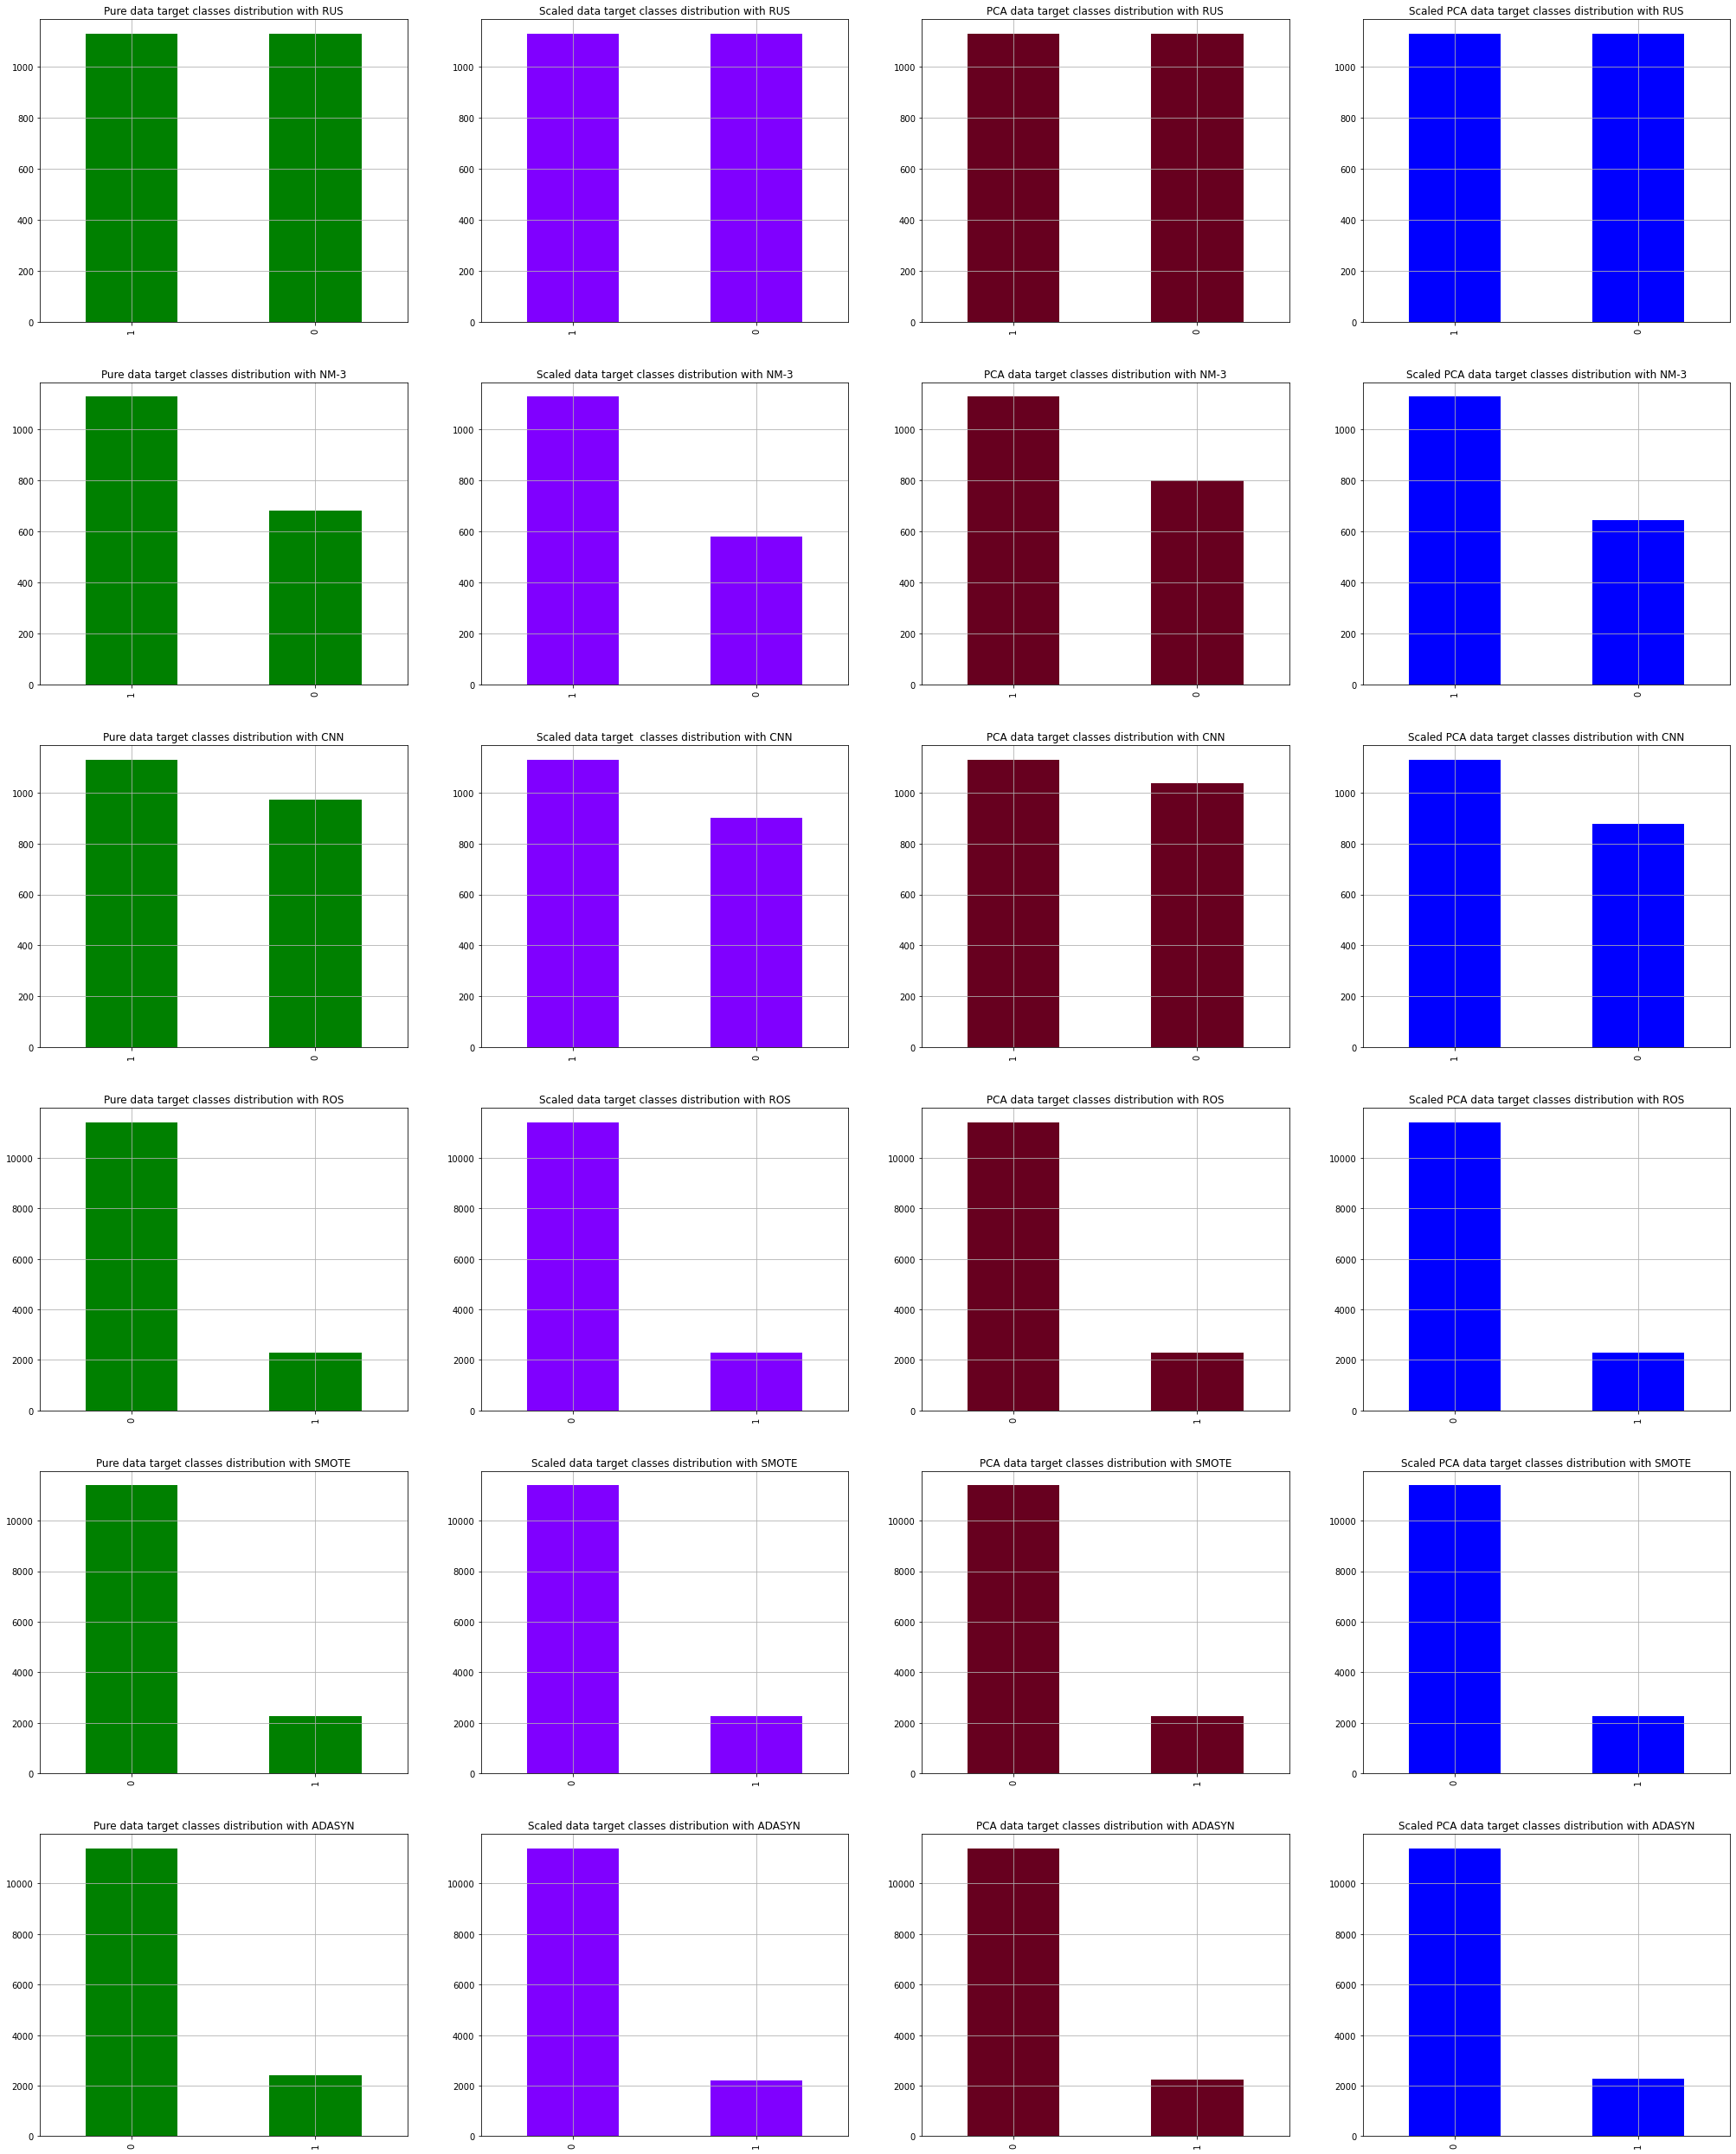

In [8]:
f, axes = plt.subplots(6, 4, figsize=(35, 45), sharex=False)

y_train_rus.value_counts().plot(kind='bar', title='Pure data target classes distribution with RUS', grid=True, colormap='ocean', ax=axes[0, 0])
y_train_scaled_rus.value_counts().plot(kind='bar', title='Scaled data target classes distribution with RUS', grid=True, colormap='rainbow', ax=axes[0, 1])
y_train_pca_rus.value_counts().plot(kind='bar', title='PCA data target classes distribution with RUS', grid=True, colormap='RdGy', ax=axes[0, 2])
y_train_scaled_pca_rus.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with RUS', grid=True, colormap='bwr', ax=axes[0, 3])

y_train_nm3.value_counts().plot(kind='bar', title='Pure data target classes distribution with NM-3', grid=True, colormap='ocean', ax=axes[1, 0])
y_train_scaled_nm3.value_counts().plot(kind='bar', title='Scaled data target classes distribution with NM-3', grid=True, colormap='rainbow', ax=axes[1, 1])
y_train_pca_nm3.value_counts().plot(kind='bar', title='PCA data target classes distribution with NM-3', grid=True, colormap='RdGy', ax=axes[1, 2])
y_train_scaled_pca_nm3.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with NM-3', grid=True, colormap='bwr', ax=axes[1, 3])

y_train_cnn.value_counts().plot(kind='bar', title='Pure data target classes distribution with CNN', grid=True, colormap='ocean', ax=axes[2, 0])
y_train_scaled_cnn.value_counts().plot(kind='bar', title='Scaled data target  classes distribution with CNN', grid=True, colormap='rainbow', ax=axes[2, 1])
y_train_pca_cnn.value_counts().plot(kind='bar', title='PCA data target classes distribution with CNN', grid=True, colormap='RdGy', ax=axes[2, 2])
y_train_scaled_pca_cnn.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with CNN', grid=True, colormap='bwr', ax=axes[2, 3])

y_train_ros.value_counts().plot(kind='bar', title='Pure data target classes distribution with ROS', grid=True, colormap='ocean', ax=axes[3, 0])
y_train_scaled_ros.value_counts().plot(kind='bar', title='Scaled data target classes distribution with ROS', grid=True, colormap='rainbow', ax=axes[3, 1])
y_train_pca_ros.value_counts().plot(kind='bar', title='PCA data target classes distribution with ROS', grid=True, colormap='RdGy', ax=axes[3, 2])
y_train_scaled_pca_ros.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with ROS', grid=True, colormap='bwr', ax=axes[3, 3])

y_train_smote.value_counts().plot(kind='bar', title='Pure data target classes distribution with SMOTE', grid=True, colormap='ocean', ax=axes[4, 0])
y_train_scaled_smote.value_counts().plot(kind='bar', title='Scaled data target classes distribution with SMOTE', grid=True, colormap='rainbow', ax=axes[4, 1])
y_train_pca_smote.value_counts().plot(kind='bar', title='PCA data target classes distribution with SMOTE', grid=True, colormap='RdGy', ax=axes[4, 2])
y_train_scaled_pca_smote.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with SMOTE', grid=True, colormap='bwr', ax=axes[4, 3])

y_train_adasyn.value_counts().plot(kind='bar', title='Pure data target classes distribution with ADASYN', grid=True, colormap='ocean', ax=axes[5, 0])
y_train_scaled_adasyn.value_counts().plot(kind='bar', title='Scaled data target classes distribution with ADASYN', grid=True, colormap='rainbow', ax=axes[5, 1])
y_train_pca_adasyn.value_counts().plot(kind='bar', title='PCA data target classes distribution with ADASYN', grid=True, colormap='RdGy', ax=axes[5, 2])
y_train_scaled_pca_adasyn.value_counts().plot(kind='bar', title='Scaled PCA data target classes distribution with ADASYN', grid=True, colormap='bwr', ax=axes[5, 3])
